In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2113536/2110848 [==============================] - 1s 0us/step


8982

In [4]:
# decode the news
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
# preparing the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# multiple categories -> one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # or just use Keras `to_categorical`
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
# defining the models
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# validating this approach with sampled data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 170us/step - loss: 2.7174 - accuracy: 0.5282 - val_loss: 1.7715 - val_accuracy: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.4452 - accuracy: 0.7053 - val_loss: 1.3138 - val_accuracy: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.0517 - accuracy: 0.7722 - val_loss: 1.1125 - val_accuracy: 0.7620
Epoch 4/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.8130 - accuracy: 0.8287 - val_loss: 1.0085 - val_accuracy: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.6419 - accuracy: 0.8654 - val_loss: 0.9375 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.5074 - accuracy: 0.8985 - val_loss: 0.9146 - val_accuracy: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.40

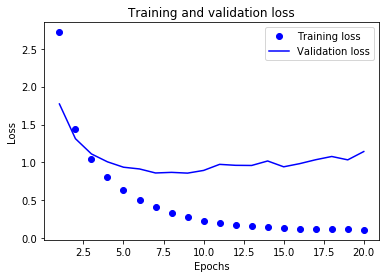

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()